In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


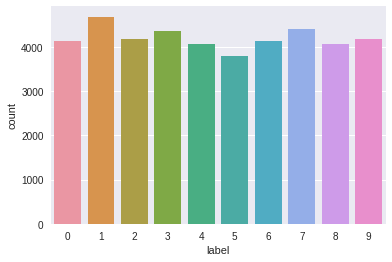

In [34]:
trainy = train["label"]
trainx = train.drop(labels = ["label"], axis = 1)
g = sns.countplot(trainy)

In [35]:
trainy.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [36]:
trainx.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
trainx /= 255
test /= 255

In [0]:
trainx = trainx.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [0]:
trainy = to_categorical(trainy, num_classes = 10)

In [0]:
seed = 10

In [0]:
trainx, valx, trainy, valy = train_test_split(trainx, trainy, test_size = 0.1, random_state = seed)

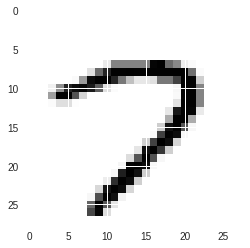

In [42]:
g = plt.imshow(trainx[1][:,:,0])

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "same", activation = "relu", input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


In [0]:
optimizer = RMSprop(lr = 0.001)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])


In [0]:
epochs = 5
batch_size = 64
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
datagen = ImageDataGenerator(zoom_range = 0.1,height_shift_range = 0.1,width_shift_range = 0.1,rotation_range = 10)


In [47]:
hist = model.fit_generator(datagen.flow(trainx, trainy,batch_size = batch_size), epochs = epochs, validation_data = (valx, valy), verbose = 2, steps_per_epoch = trainx.shape[0]//batch_size, callbacks = [annealer])

Epoch 1/5
 - 18s - loss: 0.4274 - acc: 0.8615 - val_loss: 0.0741 - val_acc: 0.9748
Epoch 2/5
 - 17s - loss: 0.1372 - acc: 0.9583 - val_loss: 0.0515 - val_acc: 0.9838
Epoch 3/5
 - 17s - loss: 0.1064 - acc: 0.9690 - val_loss: 0.0323 - val_acc: 0.9860
Epoch 4/5
 - 17s - loss: 0.0871 - acc: 0.9748 - val_loss: 0.0273 - val_acc: 0.9912
Epoch 5/5
 - 17s - loss: 0.0819 - acc: 0.9760 - val_loss: 0.0291 - val_acc: 0.9893


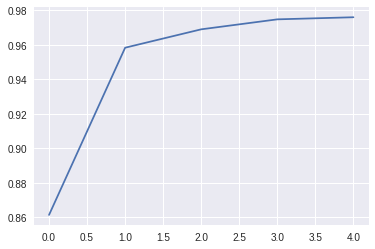

In [50]:
plt.plot(hist.history["acc"])

In [0]:
yhat = model.predict(valx)

In [0]:
ypred = np.argmax(yhat, axis = 1)
ytrue = np.argmax(valy, axis = 1)
cm = confusion_matrix(ytrue, ypred)

In [53]:
print(cm)

[[412   0   0   0   0   0   1   0   2   0]
 [  0 461   4   1   1   0   0   0   1   0]
 [  0   0 431   0   0   0   0   1   0   0]
 [  0   0   2 435   0   2   0   1   3   0]
 [  0   1   0   0 389   0   1   0   0   5]
 [  0   0   0   2   0 388   1   0   1   0]
 [  0   0   0   0   1   1 374   0   0   0]
 [  0   0   1   0   0   0   0 437   0   0]
 [  0   0   2   0   0   0   2   0 418   1]
 [  2   0   0   0   2   0   0   2   1 410]]
